In [1]:
#import important libraries
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn import metrics
import random

In [2]:
#reading the file 
df=pd.read_csv("fraud.csv")


In [3]:
df_temp = pd.DataFrame(columns=['step', 'type','amount','oldbalanceDest','oldbalanceOrg','newbalanceOrig','newbalanceDest','fraud'])


In [4]:
df_temp['step']=df['step']
df_temp['type']=df['type']
df_temp['oldbalanceDest']=df['oldbalanceDest']
df_temp['oldbalanceOrg']=df['oldbalanceOrg']
df_temp['newbalanceOrig']=df['newbalanceOrig']
df_temp['newbalanceDest']=df['newbalanceDest']
df_temp['amount']=df['amount']
df_temp['fraud']=df['isFraud']

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_temp["type"] = ord_enc.fit_transform(df_temp[["type"]])

In [5]:
#creating two dataframes that contains predictors and outcomes for training dataset
X=df_temp.drop(['fraud'],axis=1)
Y=df_temp['fraud']

#from sklearn we will import train_test_split to split the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.30, random_state=42)

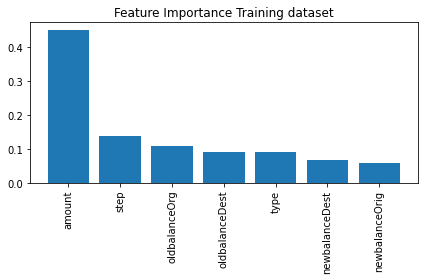

In [6]:
#now we will do the feature importance to know important features in dataset using randomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#initializing the estimator for randomforest regressor
regr = RandomForestClassifier(max_depth=2, random_state=0)

#training the model on training dataset using fit function
regr.fit(x_train,y_train.values.ravel())

#we will use feature_importances_ function of RandomForest
importances = regr.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

 
plt.title('Feature Importance Training dataset')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [7]:
#creating a new dataframe to store necassary columns that will be needed for Undersampling 
extract_data = pd.DataFrame(columns=['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud'])

#adding data to these columns
extract_data['type']=df['type']
extract_data['amount']=df['amount']
extract_data['oldbalanceOrg']=df['oldbalanceOrg']
extract_data['newbalanceOrig']=df['newbalanceOrig']
extract_data['oldbalanceDest']=df['oldbalanceDest']
extract_data['newbalanceDest']=df['newbalanceDest']
extract_data['isFraud']=df['isFraud']

In [8]:
# creating two dfs for storing predictors and outcomes
X = extract_data.drop(['isFraud'], axis=1)
Y = extract_data['isFraud']

#making clusters of fraud and not fraud data to balance support and confidence
#appling Undersampling method
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
x,y = rus.fit_resample(X,Y)

#converting DOWN SAMPLING datasets to dataframe
extract_data = pd.concat([pd.DataFrame(x), pd.DataFrame(y, columns=['isFraud'])], axis=1)

In [9]:
transactions=extract_data.to_numpy()
transactions=transactions.tolist()
transactions

[['TRANSFER', 22190.99, 52231.01, 30040.03, 0.0, 22190.99, 0],
 ['PAYMENT', 5055.22, 1054.0, 0.0, 0.0, 0.0, 0],
 ['PAYMENT', 467.96, 0.0, 0.0, 0.0, 0.0, 0],
 ['CASH_OUT', 125390.25, 0.0, 0.0, 2584029.08, 2953627.7, 0],
 ['CASH_OUT', 443730.64, 204821.0, 0.0, 154051.97, 933145.81, 0],
 ['CASH_IN', 95285.69, 8099449.11, 8194734.8, 2602574.11, 2775439.16, 0],
 ['PAYMENT', 29381.79, 5945.0, 0.0, 0.0, 0.0, 0],
 ['PAYMENT', 9262.01, 10803.0, 1540.99, 0.0, 0.0, 0],
 ['CASH_OUT', 327392.99, 22175.0, 0.0, 7191.0, 322903.3, 0],
 ['CASH_OUT', 18016.53, 61184.0, 43167.47, 20527.0, 38543.53, 0],
 ['CASH_IN', 185115.04, 5881299.41, 6066414.45, 1396562.97, 1937581.53, 0],
 ['PAYMENT', 12145.77, 6320424.47, 6308278.7, 0.0, 0.0, 0],
 ['CASH_OUT', 155242.9, 0.0, 0.0, 458513.66, 515840.95, 0],
 ['PAYMENT', 7192.41, 5209.0, 0.0, 0.0, 0.0, 0],
 ['CASH_OUT', 121704.33, 101468.0, 0.0, 885857.7, 1268132.69, 0],
 ['CASH_IN', 24330.1, 6395969.59, 6420299.68, 4728284.63, 4819671.34, 0],
 ['CASH_OUT', 585853.28, 

In [10]:
#In this list, all the values in the rows  will be stored for each column that has Fraud==1

amount_list=[]
oldbalanceOrg_list=[]
newbalanceOrig_list=[]
oldbalanceDest_list=[]
newbalanceDest_list=[]
#iterayting through transaction and appending the values of all columns in their respective lists
for i in range(0,len(transactions)):
    if transactions[i][6]==1:
        amount_list.append(transactions[i][1])
        oldbalanceOrg_list.append(transactions[i][2])
        newbalanceOrig_list.append(transactions[i][3])
        oldbalanceDest_list.append(transactions[i][4])
        newbalanceDest_list.append(transactions[i][5])
amount_list

[181.0,
 181.0,
 2806.0,
 2806.0,
 20128.0,
 20128.0,
 416001.33,
 1277212.77,
 1277212.77,
 35063.63,
 35063.63,
 25071.46,
 25071.46,
 132842.64,
 235238.66,
 235238.66,
 1096187.24,
 1096187.24,
 963532.14,
 963532.14,
 14949.84,
 14949.84,
 18627.02,
 18627.02,
 10539.37,
 10539.37,
 22877.0,
 22877.0,
 10000000.0,
 10000000.0,
 2930418.44,
 2930418.44,
 169941.73,
 169941.73,
 13707.11,
 13707.11,
 86070.17,
 86070.17,
 120074.73,
 120074.73,
 60726.57,
 60726.57,
 10119.47,
 10119.47,
 33332.86,
 33332.86,
 25975.86,
 25975.86,
 26768.5,
 26768.5,
 30521.02,
 30521.02,
 216422.0,
 216422.0,
 17320.91,
 17320.91,
 17246.0,
 17246.0,
 10565.0,
 10565.0,
 10224.0,
 10224.0,
 85354.69,
 85354.69,
 13704.0,
 13704.0,
 262434.54,
 262434.54,
 21729.0,
 21729.0,
 5460002.91,
 5460002.91,
 164.0,
 164.0,
 21571.0,
 21571.0,
 441445.58,
 441445.58,
 181728.11,
 222.0,
 222.0,
 1996.17,
 1996.17,
 1078013.76,
 89631.24,
 89631.24,
 29707.86,
 29707.86,
 43092.0,
 43092.0,
 556218.01,
 5562

In [11]:
#this function is called to know the range in which most of the values occured for each list
def check_frequency(lis,Max,Min):
    
    #this is sequence to compare the items of list to specific range. 
    #this sequence contains the values from min to max range
    sequence=[int(Min),int(Min*2/3),int(Min*3/4),int(Min*2),int(Max/10),int(Max/8),int(Max/4),int(Max/2),int(Max*(3/4)),int(Max)]

    #this dict will store the count of each sequence item
    seq={sequence[0]:0,
     sequence[1]:0,
     sequence[2]:0,
     sequence[3]:0,
     sequence[4]:0,
     sequence[5]:0,
     sequence[6]:0,
     sequence[7]:0,
     sequence[8]:0,
     sequence[9]:0
    }
    
    #applying rules on each
    for i in range(0,len(lis)):
        if lis[i] <=sequence[0]:
            seq[sequence[0]]+=1

        elif lis[i]<=sequence[1]:
            seq[sequence[1]]+=1

        elif lis[i]<=sequence[2]:
            seq[sequence[2]]+=1

        elif lis[i]<=sequence[3]:
            seq[sequence[3]]+=1

        elif lis[i]<=sequence[4]:
            seq[sequence[4]]+=1
        elif lis[i]<=sequence[5]:
            seq[sequence[5]]+=1

        elif lis[i]<=sequence[6]:
            seq[sequence[6]]+=1

        elif lis[i]<=sequence[7]:
            seq[sequence[7]]+=1

        elif lis[i]<=sequence[8]:
            seq[sequence[8]]+=1
            
        elif lis[i]<=sequence[9]:
            seq[sequence[9]]+=1
            
     
    #created a list to store the key and value that has highest support
    high_freq=[0,0]
    
    #iterating through each dict key to compare support values to get max value support
    for x,y in seq.items():
        
        #calculating support
        seq[x]=round(y/len(lis),3)
        if seq[x]> high_freq[1]:
            high_freq[1]=seq[x]
            high_freq[0]=x
   
    print(seq)
    #we will return value that has highest frequency. The value will be any one of the value in the list sequence.
    return high_freq
M=max(oldbalanceOrg_list)
x=check_frequency(oldbalanceOrg_list,int(M),int(min(oldbalanceOrg_list)))
{0: 0.034, 1293041: 0.888, 1616302: 0.009, 3232604: 0.034, 6465209: 0.017, 9697813: 0.0, 12930418: 0.009}
#second call
check_frequency(oldbalanceOrg_list,x[0],int(min(oldbalanceOrg_list)))
{0: 0.034, 129304: 0.647, 161630: 0.0, 323260: 0.086, 646520: 0.086, 969780: 0.017, 1293041: 0.052}
[129304, 0.647]
#This function is used to iterate through each list to get good support value
def get_limit(lis):
    
    #In the first call, we will pass maximum value
    Max=int(max(lis))
    Min=int(min(lis))
    #This function will return a list containing value and its frequency, we are storing its response in fre variable
    fre=check_frequency(lis,Max,Min)
    
    #In the second pass, we will pass the value that was returned by first call to further apply conditions
    freq=check_frequency(lis,fre[0],Min)
    
    #returning the second call response limit value
    return freq[0]
#To get limit of each variable, we are calling the get_limit() function for each list we have created to store each column data
print("amount List limit value")
amount_limit=round(get_limit(amount_list),0)
print("oldbalanceOrg List limit value")
oldbalanceOrg_limit=round(get_limit(oldbalanceOrg_list),0)
print("newbalanceList  limit value")
newbalanceOrg_limit=round(get_limit(newbalanceOrig_list),0)
print("oldbalanceDest limit value")
oldbalanceDest_limit=round(get_limit(oldbalanceDest_list),0)
print("newbalanceDest limit value")
newbalanceDest_limit=round(get_limit(newbalanceDest_list),0)

{0: 0.034, 1293041: 0.888, 1616302: 0.009, 3232604: 0.034, 6465209: 0.017, 9697813: 0.0, 12930418: 0.009}
{0: 0.034, 129304: 0.647, 161630: 0.0, 323260: 0.086, 646520: 0.086, 969780: 0.017, 1293041: 0.052}
amount List limit value
{164: 0.017, 109: 0.0, 123: 0.0, 328: 0.034, 1000000: 0.819, 1250000: 0.043, 2500000: 0.017, 5000000: 0.034, 7500000: 0.017, 10000000: 0.017}
{164: 0.017, 109: 0.0, 123: 0.0, 328: 0.034, 100000: 0.569, 125000: 0.017, 250000: 0.086, 500000: 0.086, 750000: 0.034, 1000000: 0.026}
oldbalanceOrg List limit value
{0: 0.034, 1293041: 0.888, 1616302: 0.009, 3232604: 0.034, 6465209: 0.017, 9697813: 0.0, 12930418: 0.009}
{0: 0.034, 129304: 0.647, 161630: 0.0, 323260: 0.086, 646520: 0.086, 969780: 0.017, 1293041: 0.052}
newbalanceList  limit value
{0: 0.983, 293041: 0.0, 366302: 0.0, 732604: 0.009, 1465209: 0.0, 2197813: 0.0, 2930418: 0.0}
{0: 0.983}
oldbalanceDest limit value
{0: 0.655, 1301050: 0.31, 1626312: 0.0, 3252625: 0.009, 6505251: 0.017, 9757876: 0.0, 13010502:

In [12]:
#Storing each list into specific dict key according to type
num_transactions=len(transactions)
conditions={
    "CASH_IN":[],
    "CASH_OUT":[],
     "DEBIT":[],
    "PAYMENT":[],
    "TRANSFER":[],
}
#Going through each datapoint and only those values will be appended that has Fraud==1
for i in range(0,len(transactions)):
    if transactions[i][6]==1:
        if transactions[i][0]=='CASH_IN':
            conditions['CASH_IN'].append(transactions[i])
            
        if transactions[i][0]=='CASH_OUT':
            conditions['CASH_OUT'].append(transactions[i])
            
        if transactions[i][0]=='DEBIT':
            conditions['DEBIT'].append(transactions[i])
            
        if transactions[i][0]=='PAYMENT':
            conditions['PAYMENT'].append(transactions[i])
            
        if transactions[i][0]=='TRANSFER':
            conditions['TRANSFER'].append(transactions[i])

In [13]:
#This function will write the rules that are passed by get_rules function
def write_rules(rules):
    final_rules=""
    if len(rules[1])>1:
        final_rules+="{ "+rules[1][0]
        final_rules+=" ,type=="+str(rules[0])
        final_rules+=" ,"+rules[1][1]
        final_rules+=" ,"+rules[1][2]
        final_rules+= " Support : {0:2.7f}".format(rules[2])
        final_rules+=" confidence : {0:2.7f}  ".format(rules[3])
        final_rules+=" } -> {FRAUD}"
    else:   
        final_rules=" "
        final_rules+="{ "+rules[1][0]
        final_rules+=" , type=="+str(rules[0])
        final_rules+= " Support : {0:2.7f}".format(rules[2])
        final_rules+=" confidence : {0:2.7f}  ".format(rules[3])
        final_rules+=" } -> {FRAUD}"
    
    return final_rules

#this function will check if rules count >= threshold it will append to rules and pass it to write_rules function to write rules
def check_threshold(length,rules,count,name,type_name,min_support,min_confidence):
    confidence=count/length
    support=count/num_transactions
    if confidence>=min_confidence and support>= min_support:
        rules.append(write_rules([type_name,name,support,confidence]))
        return rules
    return rules

#after getting the values stored as key-value pair, we will iterate through each datapouint and will apply conditions on it to get patterns

def get_rules(conditions,min_support,min_confidence):
    #Dict to store count of each condition that is satisfied 

    case=conditions[0][0] #getting transaction type name
    
    # these variables will be used as dict key to store count of each condition that appears to be true for specific transaction
    oldbalanceOrg_greater="oldbalanceOrg > "+str(oldbalanceOrg_limit)
    oldbalanceOrg_less="oldbalanceOrg <="+str(oldbalanceOrg_limit)
    
    newbalanceOrg_greater="newbalanceOrg > "+str(newbalanceOrg_limit)
    newbalanceOrg_less="newbalanceOrg <="+str(newbalanceOrg_limit)
    
    newbalanceDest_greater="newbalanceDest > "+str(newbalanceDest_limit)
    newbalanceDest_less="newbalanceDest <="+str(newbalanceDest_limit)
    
    newbalanceDest_greater="newbalanceDest > "+str(newbalanceDest_limit)
    newbalanceDest_less="newbalanceDest <="+str(newbalanceDest_limit)
    
    amount_greater="amount > "+str(amount_limit)
    amount_less="amount <="+str(amount_limit)
    amount_equal="amount == oldbalanceOrg"
    
    oldbalanceDestequalsnew="oldbalanceDest==newbalanceDest"
    oldnewDestequalszero="oldbalanceDest==newbalanceDest==0 and oldbalanceOrg >0 "
    oldbalanceequalsamount_limit="oldbalanceOrg=="+str(amount_limit)
    oldbalanceequalsamount="oldbalance==amount"
    newbalanceDest_less="newbalanceDest<="+str(newbalanceDest_limit)    
            
    #dict named type will store the count of each transaction that satisfies the following 
    Type= {
            oldbalanceequalsamount : 0,
            oldbalanceDestequalsnew : 0,
            oldnewDestequalszero:0,
            oldbalanceequalsamount_limit :0,
            oldbalanceOrg_less:
                {
                    newbalanceOrg_greater:
                    {
                        amount_less: 0,amount_greater: 0
                    },
                    newbalanceOrg_less:
                    {
                       amount_less: 0,amount_greater: 0
                    },
                    newbalanceDest_greater :
                    {
                      
                      amount_less: 0,amount_greater: 0,amount_equal:0,'count':0
                    },
                     newbalanceDest_less:{
                    amount_greater :0,amount_less:0,amount_equal:0,'count':0
                }
                },
                
            oldbalanceOrg_greater:
                   {
                    newbalanceOrg_greater:
                       {
                         amount_less: 0,amount_greater: 0,'count':0
                     },
                    newbalanceOrg_less:
                       {
                         amount_less: 0,amount_greater: 0},
                    newbalanceDest_less :
                       {
                         amount_less: 0,amount_greater: 0 ,amount_equal:0
                       },
                    newbalanceDest_greater:
                       {
                         amount_less: 0,amount_greater: 0, amount_equal :0
                       }
                   },
                     
                
                }    
    #This will iterate through values of each key        
    for i in range(0,len(conditions)):
        amount=conditions[i][1]
        oldbalanceOrg=conditions[i][2]
        newbalanceOrg= conditions[i][3]
        oldbalanceDest= conditions[i][4]
        newbalanceDest= conditions[i][5]           
        isFraud= conditions[i][6]
        dest_balance_diff=newbalanceDest-oldbalanceDest
        
        #applying rules _ for each datapoint that satisfies the condition, it will increment count by 1
        
        if oldbalanceOrg >oldbalanceOrg_limit and newbalanceOrg > newbalanceOrg_limit and amount>amount_limit:
            Type[oldbalanceOrg_greater][newbalanceOrg_greater][amount_greater]+=1
            
        elif oldbalanceOrg <=oldbalanceOrg_limit and newbalanceDest<=newbalanceDest_limit:
            Type[oldbalanceOrg_less][newbalanceDest_less]['count']+=1
                 
        elif oldbalanceDest==newbalanceDest and oldbalanceDest==0 and oldbalanceOrg >0:
            Type[oldnewDestequalszero]+=1
                    
        elif oldbalanceOrg==amount_limit:
            Type[oldbalanceequalsamount_limit]+=1
            
        elif oldbalanceOrg==amount:
            Type[oldbalanceequalsamount]+=1
            
        elif oldbalanceDest==newbalanceDest:
            Type[oldbalanceDestequalsnew]+=1
        
        
        elif oldbalanceOrg <=oldbalanceOrg_limit and newbalanceDest<=newbalanceDest_limit and amount==oldbalanceOrg:
            Type[oldbalanceOrg_less][newbalanceDest_less][amount_equal]+=1
        
        elif oldbalanceOrg <=oldbalanceOrg_limit and newbalanceDest>newbalanceDest_limit and amount==oldbalanceOrg:
            Type[oldbalanceOrg_less][newbalanceDest_greater][amount_equal]+=1
            
            
        elif oldbalanceOrg >oldbalanceOrg_limit and newbalanceDest<=newbalanceDest_limit and amount==oldbalanceOrg:
            Type[oldbalanceOrg_greater][newbalanceDest_less][amount_equal]+=1
            
            
        elif oldbalanceOrg >oldbalanceOrg_limit and newbalanceDest>newbalanceDest_limit and amount==oldbalanceOrg:
            Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_equal]+=1
            
                
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount>amount_limit and newbalanceOrg <newbalanceOrg_limit:
            Type[oldbalanceOrg_less][newbalanceOrg_less][amount_greater]+=1
            
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount<amount_limit and newbalanceOrg <newbalanceOrg_limit:
            Type[oldbalanceOrg_less][newbalanceOrg_less][amount_less]+=1

        elif oldbalanceOrg<=oldbalanceOrg_limit and amount>amount_limit and newbalanceOrg >newbalanceOrg_limit:
            Type[oldbalanceOrg_less][newbalanceOrg_greater][amount_greater]+=1
            
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount<amount_limit and newbalanceOrg >newbalanceOrg_limit:
            Type[oldbalanceOrg_less][newbalanceOrg_greater][amount_less]+=1
            
                    
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount>amount_limit and newbalanceDest >newbalanceDest_limit:
            Type[oldbalanceOrg_less][newbalanceDest_greater][amount_greater]+=1
            
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount<amount_limit and newbalanceDest>newbalanceDest_limit:
            Type[oldbalanceOrg_less][newbalanceDest_greater][amount_less]+=1
            
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount<amount_limit and newbalanceDest<=newbalanceDest_limit:
            Type[oldbalanceOrg_less][newbalanceDest_less][amount_less]+=1
            
        elif oldbalanceOrg<=oldbalanceOrg_limit and amount>amount_limit and newbalanceDest<=newbalanceDest_limit:
            Type[oldbalanceOrg_less][newbalanceDest_less][amount_greater]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount>amount_limit and newbalanceOrg >newbalanceOrg_limit:
            Type[oldbalanceOrg_greater][newbalanceOrg_greater][amount_greater]+=1
     
        elif oldbalanceOrg>oldbalanceOrg_limit and amount<amount_limit and newbalanceOrg >newbalanceOrg_limit:
            Type[oldbalanceOrg_less][newbalanceOrg_greater][amount_less]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount>amount_limit and newbalanceOrg <newbalanceOrg_limit:
            Type[oldbalanceOrg_greater][newbalanceOrg_less][amount_greater]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount<amount_limit and newbalanceOrg <newbalanceOrg_limit:
            Type[oldbalanceOrg_greater][newbalanceOrg_less][amount_less]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount>amount_limit and newbalanceDest <=newbalanceDest_limit:
            Type[oldbalanceOrg_greater][newbalanceDest_less][amount_greater]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount<amount_limit and newbalanceDest <=newbalanceDest_limit:
            Type[oldbalanceOrg_greater][newbalanceDest_less][amount_less]+=1
        
        elif oldbalanceOrg>oldbalanceOrg_limit and amount>amount_limit and newbalanceDest >newbalanceDest_limit:
            Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_greater]+=1
            
        elif oldbalanceOrg>oldbalanceOrg_limit and amount<amount_limit and newbalanceDest >newbalanceDest_limit:
            Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_less]+=1
    #after loops complete transaction items, we will check threshold and append rules to list named rules
    
    
    length=len(conditions)           
    #this list will contain data of those transaction that satisfies the condition
    rules=[]
    #checking which condition satisfies the threshold condition
    rule=check_threshold(length,rules,Type[oldnewDestequalszero],[oldnewDestequalszero],case,min_support,min_confidence)
    rules=rule
    rule=check_threshold(length,rules,Type[oldbalanceequalsamount],[oldbalanceequalsamount],case,min_support,min_confidence)
    rules=rule
    
    rule=check_threshold(length,rules,Type[oldbalanceDestequalsnew],[oldbalanceDestequalsnew],case,min_support,min_confidence)
    rules=rule
    
    rule=check_threshold(length,rules,Type[oldbalanceequalsamount_limit],[oldbalanceequalsamount_limit],case,min_support,min_confidence)
    rules=rule
    
    
    name=[oldbalanceOrg_less,newbalanceOrg_greater,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceOrg_greater][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceOrg_greater,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceOrg_greater][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceOrg_less,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceOrg_less][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceOrg_less,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceOrg_less][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_greater,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_greater][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_greater,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_greater][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_less,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_less][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_less,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_less][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceOrg_greater,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceOrg_greater][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_less,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceOrg_greater][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceOrg_less,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceOrg_less][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceOrg_less,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceOrg_less][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_less,amount_less]
    rule =check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_less][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_less,amount_greater]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_less][amount_greater],name,case,min_support,min_confidence)
    rules=rule  
    
    name=[oldbalanceOrg_greater,newbalanceDest_greater,amount_less]
    rule=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_less],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_greater,amount_greater]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_greater,amount_equal]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_greater][amount_equal],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_greater,newbalanceDest_less,amount_equal]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceDest_less][amount_equal],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_greater,amount_equal]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_greater][amount_equal],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_less,amount_equal]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_less][amount_equal],name,case,min_support,min_confidence)
    rules=rule
    
    name=[oldbalanceOrg_less,newbalanceDest_less,'']
    rules=check_threshold(length,rules,Type[oldbalanceOrg_less][newbalanceDest_less]['count'],name,case,min_support,min_confidence)
    rules=rule
       
    
    name=[oldbalanceOrg_greater,newbalanceOrg_greater,amount_greater]
    rules=check_threshold(length,rules,Type[oldbalanceOrg_greater][newbalanceOrg_greater][amount_greater],name,case,min_support,min_confidence)
    rules=rule
    return rules


#this function will go through each dict items (conditions) and will pass it to get_rules to apply conditions
def associate_rules(conditions,min_support,min_confidence):
    results=[]
    #Now iterating through each type which has support > than min_support
    for x, y in conditions.items():
        if len(y)>0:
            output=get_rules(y,min_support,min_confidence)
            results.append(output)   
    return results
#cally associate_rules to get rules 
associate_rules(conditions,0.03,0.03)

[[' { oldbalance==amount , type==CASH_OUT Support : 0.1982759 confidence : 0.7796610   } -> {FRAUD}',
  '{ oldbalanceOrg <=129304 ,type==CASH_OUT ,newbalanceDest<=0 , Support : 0.0387931 confidence : 0.1525424   } -> {FRAUD}'],
 [' { oldbalanceDest==newbalanceDest==0 and oldbalanceOrg >0  , type==TRANSFER Support : 0.0560345 confidence : 0.2280702   } -> {FRAUD}',
  ' { oldbalance==amount , type==TRANSFER Support : 0.0301724 confidence : 0.1228070   } -> {FRAUD}',
  '{ oldbalanceOrg <=129304 ,type==TRANSFER ,newbalanceDest<=0 , Support : 0.1465517 confidence : 0.5964912   } -> {FRAUD}']]

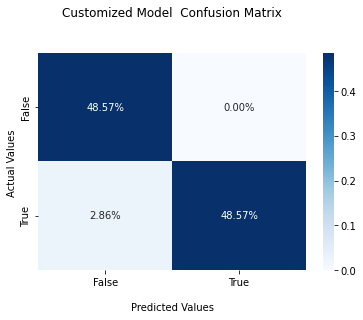

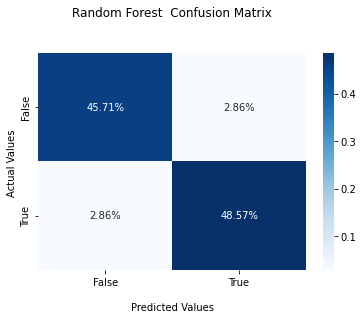

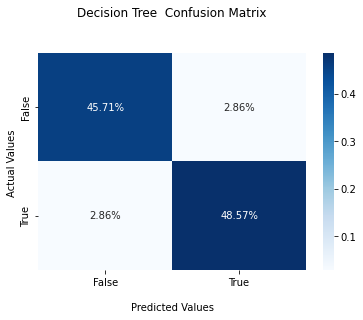

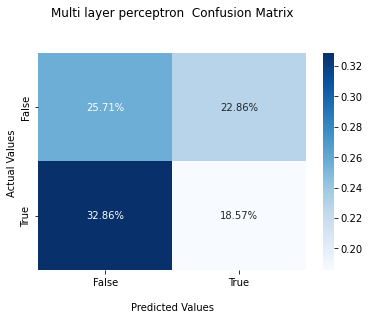

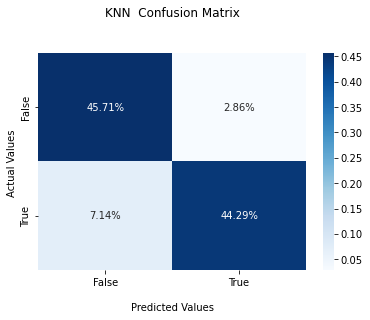

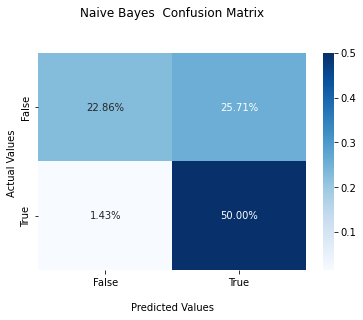

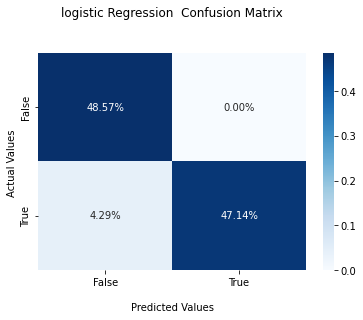

In [14]:
#Making predictions, Comparing the actual value of Isfraud with predicted value and measuring its performance
def predict(x_test):
    #now we will apply the rules generated above to test the model with x_test data
    #converting 
    X_test=x_test.to_numpy()
    X_test=X_test.tolist()
    Y_test=y_test.tolist()
    predictions=[]
    isTrue=[]
    for i in range(0,len(X_test)):
        Type=X_test[i][0]
        amount=int(X_test[i][1])
        oldbalanceOrg =int(X_test[i][2])
        newbalanceOrg=int(X_test[i][3])
        oldbalanceDest=int(X_test[i][4])
        newbalanceDest=int(X_test[i][5])
        isTrue.append(int(Y_test[i]))
        
        if oldbalanceOrg==amount and Type==0.0:
            predictions.append(1)
        elif oldbalanceOrg==amount and Type==1.0:
            predictions.append(1)

        elif oldbalanceOrg <=129304  and Type==1.0 and newbalanceDest<=0:
            predictions.append(1)
        elif oldbalanceOrg <=129304.0  and Type==0.0 and newbalanceDest<=0:
            predictions.append(1)
                            
        elif oldbalanceDest==newbalanceDest and newbalanceDest==0 and oldbalanceOrg>0 and Type==1.0:
            predictions.append(1)
    
        else:
            predictions.append(0)
            
        
               
    TP=0
    TN=0
    FP=0
    FN=0
    for j in range(0,len(isTrue)):
        if isTrue[j]==1 and predictions[j]==1:
            TP+=1
        elif isTrue[j]==0 and predictions[j]==1:
            FP+=1
        elif isTrue[j]==1 and predictions[j]==0:
            FN+=1
        elif isTrue[j]==0 and predictions[j]==0:
            TN+=1
    total=TP+FP+FN+TN
    accuracy=(TP+TN)/total
    precision= TP/(TP+FP)
    recall = TP/(TP+FN)  
    return predictions
extract_data["type"].replace({"CASH_OUT": 0, "TRANSFER": 1,"PAYMENT":2,"DEBIT":3,"CASH_IN":4}, inplace=True)
# creating two dfs for storing predictors and outcomes
X = extract_data.drop(['isFraud'], axis=1)
Y = extract_data['isFraud']

#spliting dataset 
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.30, random_state=42)


#appling Undersampling method
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
x_train, y_train = rus.fit_resample(x_train, y_train)

#from imblearn.over_sampling import SMOTE
#sm=SMOTE()
#x_train,y_train=sm.fit_resample(x_train,y_train)
#list to store values for each model
Accuracy=[] 
models=[]
FPR=[]
TPR=[]
auc_score=[]
cf_matrix=[]
Predictions=[]
def get_confusion_matrix():
    for i in range(0,len(cf_matrix)):
        ax = sn.heatmap(cf_matrix[i]/np.sum(cf_matrix[i]), annot=True, 
                fmt='.2%', cmap='Blues')
        ax.set_title(models[i]+'  Confusion Matrix\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
        plt.show()
def get_classication_report():
    for i in range(0,len(models)):
        print("    ")
        print(models[i]+"  Classification Report           ")
        print(" ")
        print(classification_report(y_test, Predictions[i], labels=[0,1]))
def get_ROC_curve():
    fig = plt.figure(figsize=(8,6))

    for i in range(len(FPR)):
        plt.plot(FPR[i], 
                 TPR[i], 
                 label="{}, AUC={:.3f}".format(models[i],auc_score[i]))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
#this function will add scores of each model to list to be used for graphs
def measure_performance(prediction,model_name):
    cm=confusion_matrix(y_test, prediction)
    cf_matrix.append(cm)
    accuracy=round(accuracy_score(y_test,prediction),3)
    Accuracy.append(accuracy)                
    models.append(model_name)
    Predictions.append(prediction)

    auc = metrics.roc_auc_score(y_test,prediction)
    auc_score.append(round(auc,3))
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction)
    FPR.append(false_positive_rate)
    TPR.append(true_positive_rate)
#Making predictions on custom models and storing scores in lists by calling measure_performance function
custom_predict= predict(x_test)
measure_performance(custom_predict,"Customized Model")
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Random Forest")
#DECISION TREE CLASSIFIER before hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  
model= DecisionTreeClassifier(random_state=0) 
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Decision Tree")
#Multi perceptron Classifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',hidden_layer_sizes=(5,), random_state=1,max_iter=500)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Multi layer perceptron")
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"KNN")
from sklearn.naive_bayes import GaussianNB
# Init the Gaussian Classifier
model = GaussianNB()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Naive Bayes")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
prediction=clf.predict(x_test)
measure_performance(prediction,"logistic Regression")
get_confusion_matrix()

In [15]:
get_classication_report()


    
Customized Model  Classification Report           
 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.94      0.97        36

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

    
Random Forest  Classification Report           
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           1       0.94      0.94      0.94        36

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

    
Decision Tree  Classification Report           
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           1       0.94      0.94      0.94        36

    accuracy  

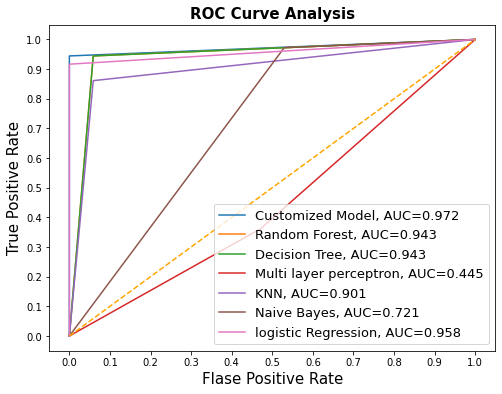

In [16]:
get_ROC_curve()
